In [1]:
import pandas as pd
import numpy as np
import covsirphy as cvp

In [2]:
df = pd.read_csv('data_us.csv')

In [3]:
df.tail()

,Unnamed: 0,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
174,174,2020-07-14,3431574,136466,1049098,2246010,67417,900,17159,339573798,336142224,19.633045,67417
175,175,2020-07-15,3498902,137415,1075882,2285605,67328,949,26784,339573798,336074896,19.632845,67328
176,176,2020-07-16,3576157,138358,1090645,2347154,77255,943,14763,339573798,335997641,19.632615,77255
177,177,2020-07-17,3647715,139266,1107204,2401245,71558,908,16559,339573798,335926083,19.632402,71558
178,178,2020-07-18,3711413,140119,1122720,2448574,63698,853,15516,339573798,335862385,19.632212,63698


In [4]:
data_cols = ['Deaths', 'Recovered', 'Active', 'Log susceptiple']

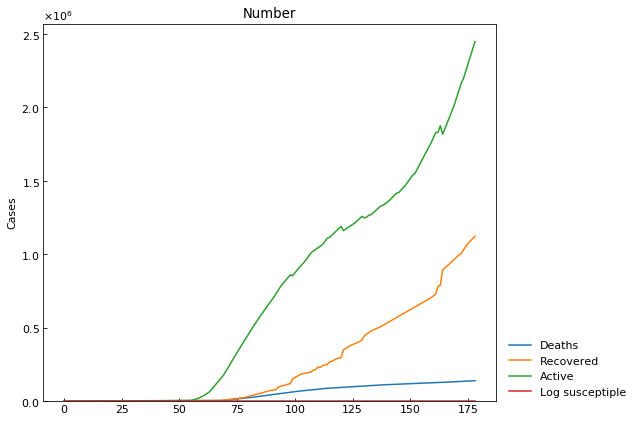

In [5]:
cvp.line_plot(df[data_cols], 'Number')

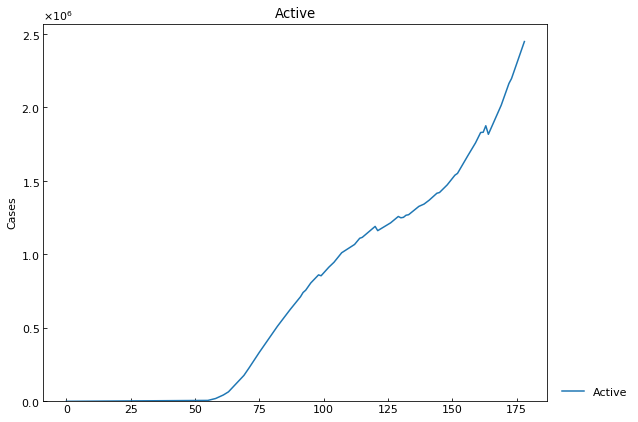

In [6]:
cvp.line_plot(df['Active'], 'Active')

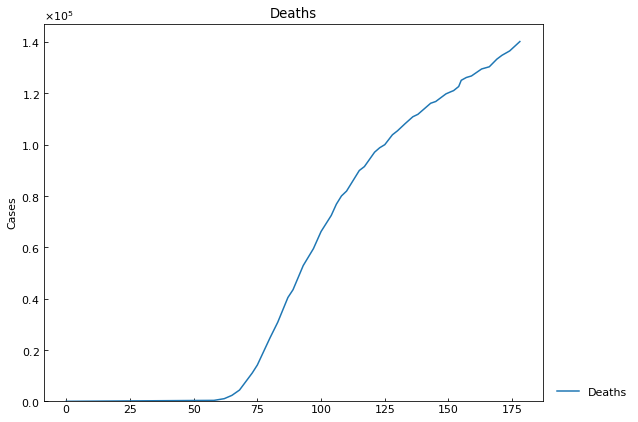

In [7]:
cvp.line_plot(df['Deaths'], 'Deaths')

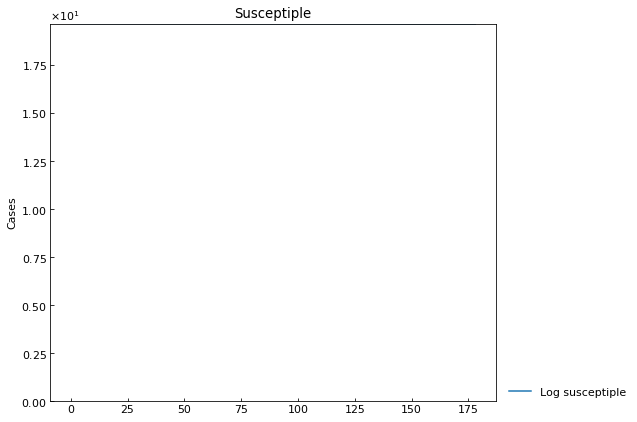

In [8]:
cvp.line_plot(df['Log susceptiple'], 'Susceptiple')

In [8]:
eg_population, s0, i0, r0, d0 = df['Population'][0], df['Susceptiple'][0], df['Active'][0], df['Recovered'][0], df['Deaths'][0]

In [9]:
print(eg_population, s0, i0, r0, d0)

338752267 338752266 1 0 0


In [31]:
eg_r0, eg_kappa, eg_rho = (4, 0.005, 0.2)
eg_sigma = eg_rho / eg_r0 - eg_kappa
eg_initials = (0.999, 0.001, 0, 0)

In [43]:
sird_param_dict = {
    "kappa": eg_kappa, "rho": eg_rho, "sigma": eg_sigma
}
sird_simulator = cvp.ODESimulator(country="Example", province="SIR-D")
sird_simulator.add(
    model=cvp.SIRD, step_n=300, population=eg_population,
    param_dict=sird_param_dict,
    y0_dict={"Susceptible": s0, "Infected": i0, "Recovered": r0, "Fatal": d0}
)
sird_simulator.run()
sird_simulator.non_dim().tail()

,t,x,y,z,w
296,296,0.019530,0.000528,0.881948,0.097994
297,297,0.019528,0.000504,0.881971,0.097997
298,298,0.019526,0.000482,0.881993,0.097999
299,299,0.019524,0.000460,0.882014,0.098002
300,300,0.019522,0.000439,0.882035,0.098004


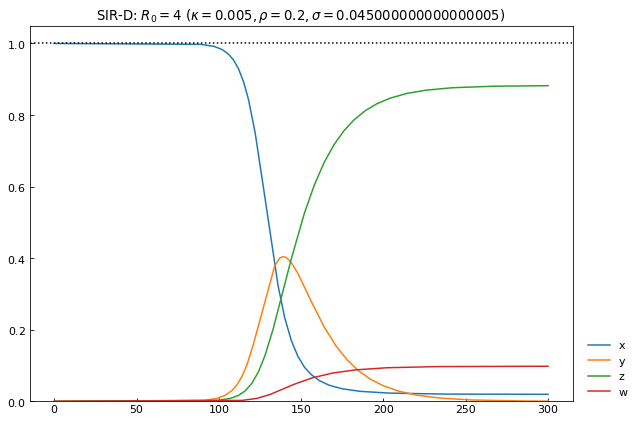

In [44]:
cvp.line_plot(
    sird_simulator.non_dim().set_index("t"),
    title=r"SIR-D: $R_0={0}\ (\kappa={1}, \rho={2}, \sigma={3})$".format(eg_r0, eg_kappa, eg_rho, eg_sigma),
    ylabel="",
    h=1
)


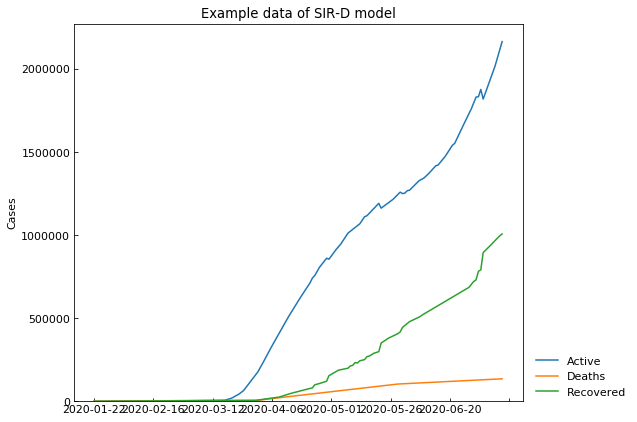

,Unnamed: 0,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Population,Susceptiple,Log susceptiple,Decresed susceptiple
168,168,2020-07-08,3054699,132300,953462,1968937,58601,820,16986,338752267,335697568,19.631721,58601
169,169,2020-07-09,3117946,133290,969111,2015545,63247,990,15649,338752267,335634321,19.631533,63247
170,170,2020-07-10,3184573,134092,983185,2067296,66627,802,14074,338752267,335567694,19.631334,66627
171,171,2020-07-11,3245925,134777,995576,2115572,61352,685,12391,338752267,335506342,19.631151,61352
172,172,2020-07-12,3304942,135205,1006326,2163411,59017,428,10750,338752267,335447325,19.630975,59017


In [38]:
cvp.line_plot(
    df.set_index("Date")[["Active", "Deaths", "Recovered"]],
    "Example data of SIR-D model",
    h=eg_population, y_integer=True
)
df.tail()